In [1]:
from matplotlib import pyplot
from utils.mnist_reader import load_mnist

In [2]:
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [4]:
X_train, y_train = load_mnist('data', kind='train')

In [5]:
X_test, y_test = load_mnist('data', kind='test')

In [6]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)

In [7]:
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [8]:
X_train = X_train.astype('float32')

In [9]:
X_test = X_test.astype('float32')

In [10]:
X_train/=255

In [11]:
X_test/=255

In [12]:
number_of_classes = 26
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [13]:

# Model
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [31]:
gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2)

test_gen = ImageDataGenerator()

In [32]:
train_generator = gen.flow(X_train, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test, Y_test, batch_size=32)

In [33]:
model.fit_generator(train_generator, steps_per_epoch=2549//32, epochs=80, 
                    validation_data=test_generator)

Epoch 1/80
79/79 [==============================] - 14s 178ms/step - loss: 1.2270 - acc: 0.6263 - val_loss: 0.7688 - val_acc: 0.8013
Epoch 2/80
79/79 [==============================] - 14s 181ms/step - loss: 1.1409 - acc: 0.6524 - val_loss: 0.6971 - val_acc: 0.8109
Epoch 3/80
79/79 [==============================] - 16s 197ms/step - loss: 1.1572 - acc: 0.6516 - val_loss: 0.6599 - val_acc: 0.8269
Epoch 4/80
79/79 [==============================] - 14s 178ms/step - loss: 1.1309 - acc: 0.6528 - val_loss: 0.6938 - val_acc: 0.8109
Epoch 5/80
79/79 [==============================] - 15s 185ms/step - loss: 1.1012 - acc: 0.6618 - val_loss: 0.6839 - val_acc: 0.7981
Epoch 6/80
79/79 [==============================] - 15s 189ms/step - loss: 1.0598 - acc: 0.6729 - val_loss: 0.6998 - val_acc: 0.7949
Epoch 7/80
79/79 [==============================] - 14s 181ms/step - loss: 1.0775 - acc: 0.6684 - val_loss: 0.6515 - val_acc: 0.8109
Epoch 8/80
79/79 [==============================] - 15s 184ms/step - 

In [34]:
score = model.evaluate(X_test, Y_test)

312/312 [==============================] - 1s 2ms/step


In [35]:

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

312/312 [==============================] - 1s 2ms/step
()
('Test accuracy: ', 0.89743589590757322)


In [36]:
predictions = model.predict_classes(X_test)

In [37]:
import pandas as pd
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})


In [38]:
sub

,Actual,Predictions
0,9,9
1,18,18
2,9,9
3,23,23
4,17,17
5,25,6
6,14,14
7,19,19
8,20,20
9,18,18


In [39]:
model.save_weights("chars74k_weights_5.h5")

In [40]:
model.save('chars74k_5.h5')

In [28]:
import numpy as np
first_image = X_test[2]
print(Y_test[2])
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((64, 64))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


In [29]:
from matplotlib import pyplot as plt

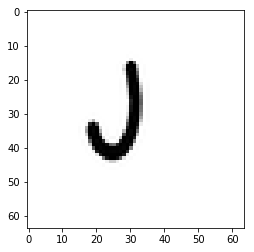

In [30]:
%matplotlib inline
plt.imshow(pixels, cmap='gray')

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       8320      
__________